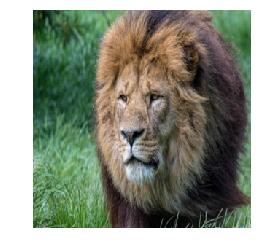

In [15]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os

width = 299
height = 299
channels = 3

test_image = mpimg.imread(os.path.join("img","lion.png"))[:, :, :channels]
plt.imshow(test_image)
plt.axis("off")
plt.show()

In [5]:
import sys
import tarfile
from six.moves import urllib

TF_MODELS_URL = "http://download.tensorflow.org/models"
INCEPTION_V3_URL = TF_MODELS_URL + "/inception_v3_2016_08_28.tar.gz"
INCEPTION_PATH = os.path.join("datasets", "inception")
INCEPTION_V3_CHECKPOINT_PATH = os.path.join(INCEPTION_PATH, "inception_v3.ckpt")

def download_progress(count, block_size, total_size):
    percent = count * block_size * 100 // total_size
    sys.stdout.write("\rDownloading: {}%".format(percent))
    sys.stdout.flush()

def fetch_pretrained_inception_v3(url=INCEPTION_V3_URL, path=INCEPTION_PATH):
    if os.path.exists(INCEPTION_V3_CHECKPOINT_PATH):
        return
    os.makedirs(path, exist_ok=True)
    tgz_path = os.path.join(path, "inception_v3.tgz")
    urllib.request.urlretrieve(url, tgz_path, reporthook=download_progress)
    inception_tgz = tarfile.open(tgz_path)
    inception_tgz.extractall(path=path)
    inception_tgz.close()
    os.remove(tgz_path)

In [6]:
fetch_pretrained_inception_v3()

Downloading: 95%

In [8]:
import re

CLASS_NAME_REGEX = re.compile(r"^n\d+\s+(.*)\s*$", re.M | re.U)

def load_class_names():
    with open(os.path.join("datasets", "inception", "imagenet_class_names.txt"), "rb") as f:
        content = f.read().decode("utf-8")
        return CLASS_NAME_REGEX.findall(content)

class_names = ["background"] + load_class_names()

In [21]:
import tensorflow as tf
from tensorflow.contrib.slim.nets import inception
import tensorflow.contrib.slim as slim

tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=[None, 299, 299, 3], name="X")
with slim.arg_scope(inception.inception_v3_arg_scope()):
    logits, end_points = inception.inception_v3(
        X, num_classes=1001, is_training=False)
predictions = end_points["Predictions"]
saver = tf.train.Saver()

In [37]:
import numpy as np

X_test = test_image.reshape(-1, height, width, channels)

with tf.Session() as sess:
    saver.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)
    predictions_val = predictions.eval(feed_dict={X: X_test})

predictions_sorted = np.argsort(predictions_val[0])[::-1][:5]

for i in range(5):
    print(class_names[predictions_sorted[i]])
    print("Accuracy: ", predictions_val[0][predictions_sorted[i]], '\n')

INFO:tensorflow:Restoring parameters from datasets\inception\inception_v3.ckpt
lion, king of beasts, Panthera leo
Accuracy:  0.924806 

chow, chow chow
Accuracy:  0.00171139 

tiger, Panthera tigris
Accuracy:  0.00103689 

leopard, Panthera pardus
Accuracy:  0.000882445 

stopwatch, stop watch
Accuracy:  0.000825146 

